## Importanto bibliotecas utilizadas na análise:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Importando as tabelas utilizadas na análise:

In [2]:
# Importando as tabelas .csv: 

db_cliente = pd.read_csv('base_clientes (1) (1) (1).csv', sep = '\t')
db_transacoes = pd.read_csv('base_transacoes (1) (1) (1).csv', sep = ';')

## Limpando os dados: 

In [3]:
# Verificando se existe valores nulos em ambas as tabelas:
db_cliente.isnull().sum() 
db_transacoes.isnull().sum()


id_tran               0
cpf                   0
estabelecimento       0
valor                 0
status                0
data                  0
Unnamed: 6         5231
dtype: int64

In [4]:
# Verificando as colunas da tabela clientes:
db_cliente.columns

Index(['cpf', 'nome', 'sexo', 'idade', 'renda', 'estado', 'email'], dtype='object')

In [5]:
# Verificando as colunas da tabela de transações:
db_transacoes.columns

# Retirando a coluna 'Unnamed: 6', pois é uma coluna sem valores e desnecessária:
db_transacoes = db_transacoes.drop(columns=['Unnamed: 6'])

In [6]:
# verificando se há clientes duplicados na base:
clientes_duplicados = db_cliente.duplicated().sum()
print(clientes_duplicados)

40


In [7]:
# Verificando se há transações duplicadas na base:
transacoes_duplicados = db_transacoes.duplicated().sum()
print(transacoes_duplicados)

0


In [8]:
# Clientes duplicados que aparecem 2 vezes no db_clientes:
cpf_duplicado = db_cliente['cpf'][db_cliente['cpf'].duplicated()].unique()
print(cpf_duplicado)


[686809896 969685417 241628473 547507596 637992749 531127715 816510790
 117125848   2317113 466360818 813379374 140101953 457018909 701529277
 430343961 260631096  35550003 983012458 295979077 235262903 524337713
 654427382 458110262 790705771 467421635 704249960 934128346 365309793
 219742196 744632081 368473236 476469328 391767350 925665564 436910234
 191349067 855387121 763141734 235053593 584413494]


In [9]:
# Removendo clientes (via coluna cpf) duplicados na base:
db_cliente = db_cliente.drop_duplicates(subset='cpf', keep='first')

# Buscando total de clientes e o perfil demográfico dos clientes:

#### número total de clientes:

In [10]:
# Filtrando quantos clientes temos na lista (via coluna cpf):
total_clientes = db_cliente['cpf'].count()
print(f'No total, temos {total_clientes} clientes na base')

No total, temos 621 clientes na base


#### distribuição por estado (UF):

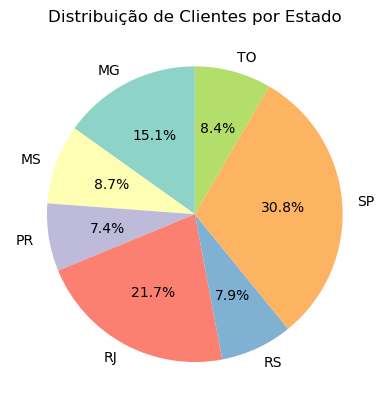

In [11]:
# Agrupando por estados:

clientes_por_estado = db_cliente.groupby('estado')['cpf'].count()

# Criando um gráfico de pizza representando os clientes por estados:

plt.pie(clientes_por_estado, labels=clientes_por_estado.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Distribuição de Clientes por Estado')
plt.show()

In [12]:
clientes_por_estado

estado
MG     94
MS     54
PR     46
RJ    135
RS     49
SP    191
TO     52
Name: cpf, dtype: int64

#### distribuição por faixa etária dos clientes:

In [13]:
# Criando uma função para dividir a renda dos clientes em faixas salariais:
# Faixa A -> 18 a 24 anos 
# Faixa B -> 25 a 31 anos
# Faixa C -> 32 a 38 anos 
# Faixa D -> 39 a 45 anos 
# Fixa E -> 46 - 52 anos 
# Faixa F -> 53 - 60 anos 

# criando função para distribuir os clientes entre as faixa etárias:
def faixa_etaria(idade):
    if idade >= 18 and idade <= 24:
        return 'Faixa A'
    elif idade > 24 and idade <= 31:
        return 'Faixa B'
    elif idade > 31 and idade <= 38:
        return 'Faixa C'
    elif idade > 38 and idade <= 45:
        return 'Faixa D'
    elif idade > 45 and idade <= 52:
        return 'Faixa E'
    elif idade > 52 and idade <= 60:
        return 'Faixa F'
    

# criando a coluna 'faixa salarial' e adicionado a faixa de acordo com a renda do cliente:
db_cliente['faixa etária'] = db_cliente['idade'].apply(faixa_etaria)

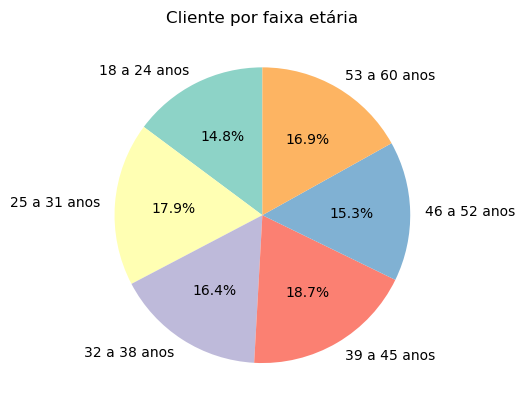

In [14]:
clientes_por_faixa_etaria = db_cliente.groupby('faixa etária')['cpf'].count()

# Criando um gráfico de pizza representando os clientes por faixa etária:

faixas_descritivas = ['18 a 24 anos', '25 a 31 anos', '32 a 38 anos', '39 a 45 anos', '46 a 52 anos', '53 a 60 anos']
clientes_por_faixa_etaria.index = faixas_descritivas
plt.pie(clientes_por_faixa_etaria, labels=clientes_por_faixa_etaria.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Cliente por faixa etária')
plt.show()

#### distribuição por gênero:

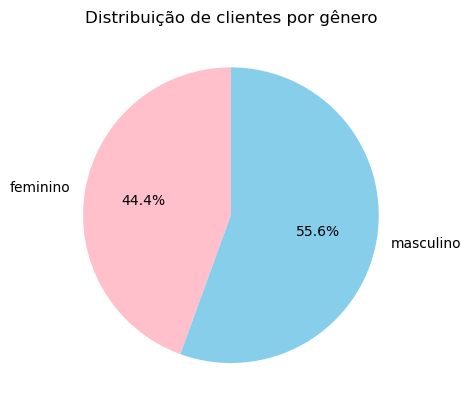

In [15]:
# Agrupando por gênero:
clientes_por_genero = db_cliente.groupby('sexo')['cpf'].count()

plt.pie(clientes_por_genero, labels=clientes_por_genero.index, autopct='%1.1f%%', startangle=90, colors=['pink','skyblue'])
plt.title('Distribuição de clientes por gênero')
plt.show()

In [16]:
clientes_por_genero

sexo
feminino     276
masculino    345
Name: cpf, dtype: int64

#### distribuição por faixa salarial dos clientes:

In [17]:
# Criando uma função para dividir a renda dos clientes em faixas salariais:
# Faixa A -> 30k a 40k 
# Faixa B -> 20k a 30k
# Faixa C -> 10k a 20k 
# Faixa D -> 0 a 10k

def faixa_salario(renda):
    if renda > 0 and renda <= 10000:
        return 'faixa D'
    elif renda > 10000 and renda <= 20000:
        return 'faixa C'
    elif renda > 20000 and renda <= 30000:
        return 'faixa B'
    elif renda > 30000 and renda <= 40000:
        return 'faixa A'
    else:
        return 'error 404'

    
# criando a coluna 'faixa salarial' e adicionado a faixa de acordo com a renda do cliente:
db_cliente['faixa salarial'] = db_cliente['renda'].apply(faixa_salario)

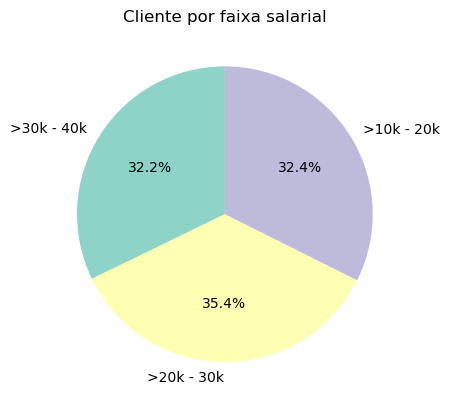

In [18]:
clientes_por_faixa_salarial = db_cliente.groupby('faixa salarial')['cpf'].count()

# Criando um gráfico de pizza representando os clientes por faixa etária:
faixas_descritivas = ['>30k - 40k', '>20k - 30k', '>10k - 20k']
clientes_por_faixa_salarial.index = faixas_descritivas
plt.pie(clientes_por_faixa_salarial, labels=clientes_por_faixa_salarial.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Cliente por faixa salarial')
plt.show()

In [19]:
clientes_por_faixa_salarial

>30k - 40k    200
>20k - 30k    220
>10k - 20k    201
Name: cpf, dtype: int64

#### Verificando a distribuição de faixa salarial x faixa etária dos clientes:

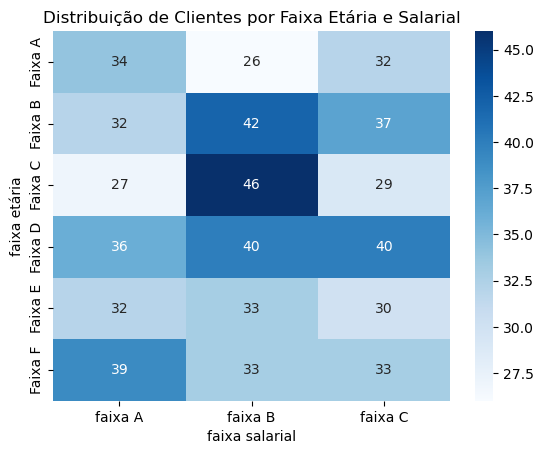

In [20]:
# Definindo a ordem personalizada das faixas etárias
faixa_etaria_ordem = ['Faixa A', 'Faixa B', 'Faixa C', 'Faixa D', 'Faixa E', 'Faixa F']

# Convertendo a coluna 'faixa etária' para uma categoria com a ordem definida
db_cliente['faixa etária'] = pd.Categorical(db_cliente['faixa etária'], categories=faixa_etaria_ordem, ordered=True)

# Agrupando e criando o heatmap
faixa_etaria_renda = db_cliente.groupby(['faixa etária', 'faixa salarial'], observed=False)['cpf'].count().unstack()

# Criando o heatmap
sns.heatmap(faixa_etaria_renda, annot=True, fmt='d', cmap='Blues')
plt.title('Distribuição de Clientes por Faixa Etária e Salarial')
plt.show()


#### distribuição por gênero e faixa salarial:

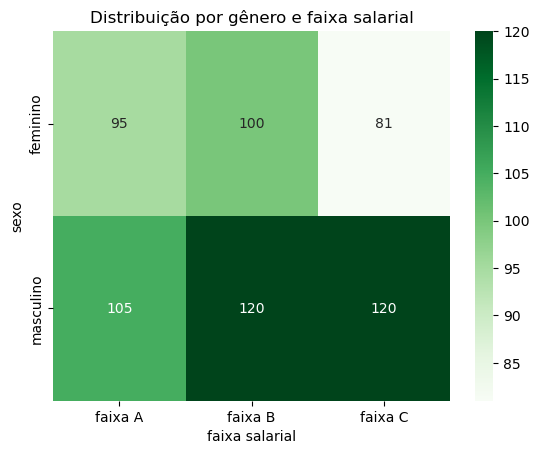

In [21]:
# Agrupando e criando o heatmap
genero_e_renda = db_cliente.groupby(['sexo', 'faixa salarial'], observed=False)['cpf'].count().unstack()

# Criando o heatmap
sns.heatmap(genero_e_renda, annot=True, fmt='d', cmap='Greens')
plt.title('Distribuição por gênero e faixa salarial')
plt.show()

## Verificando a evolução do valor mensal gasto e verificando se houver um mês com maior gasto, além de verificar se algum estabelecimento se destacou neste período:

In [22]:
# Convertendo a coluna data para o tipo datetime para facilitar a manipulacao: 

db_transacoes['data'] = pd.to_datetime(db_transacoes['data'], format='%b-%y')

In [23]:
# Filtrando as transações, selecionando o mês pela coluna 'data' e apenas as transacoes 'aprovadas':

vendas_janeiro = db_transacoes[(db_transacoes['data'].dt.month == 1) & (db_transacoes['status'] == 'aprovada')]
vendas_fevereiro = db_transacoes[(db_transacoes['data'].dt.month == 2) & (db_transacoes['status'] == 'aprovada')]
vendas_março = db_transacoes[(db_transacoes['data'].dt.month == 3) & (db_transacoes['status'] == 'aprovada')]
vendas_abril = db_transacoes[(db_transacoes['data'].dt.month == 4) & (db_transacoes['status'] == 'aprovada')]
vendas_maio = db_transacoes[(db_transacoes['data'].dt.month == 5) & (db_transacoes['status'] == 'aprovada')]


In [24]:
# somando os valores gasto de cada mês: 

valor_gasto_janeiro = vendas_janeiro['valor'].sum()
valor_gasto_fevereiro = vendas_fevereiro['valor'].sum()
valor_gasto_março = vendas_março['valor'].sum()
valor_gasto_abril = vendas_abril['valor'].sum()
valor_gasto_maio = vendas_maio['valor'].sum()

#### verificando a evolução de vendas mensais:

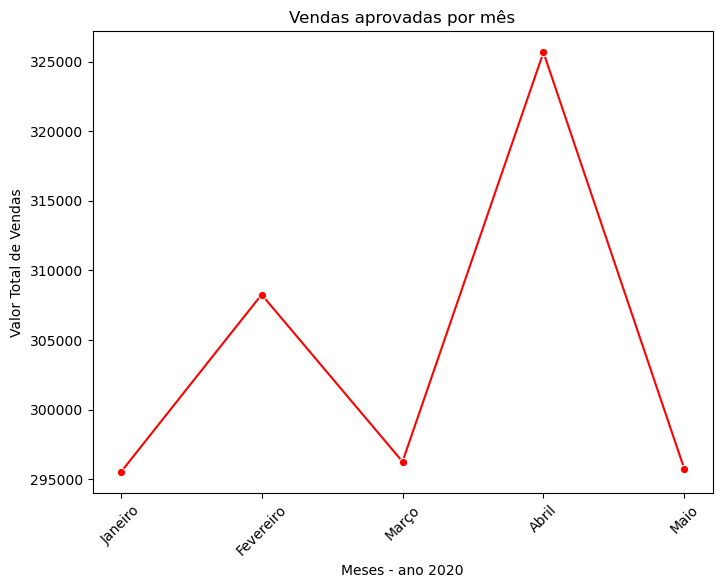

In [25]:
# criando um DataFrame com os meses e seus respectivos valores de transações realizadas:

valores_gasto_por_mes = pd.DataFrame({'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio'],
    'vendas': [valor_gasto_janeiro, valor_gasto_fevereiro, valor_gasto_março, valor_gasto_abril, valor_gasto_maio]})

# Criando o gráfico representando as vendas x mês:


plt.figure(figsize=(8, 6))
sns.lineplot( x='mes', y='vendas', data=valores_gasto_por_mes, marker='o', color='red')
plt.xticks(rotation=45)
plt.title('Vendas aprovadas por mês')
plt.ylabel('Valor Total de Vendas')
plt.xlabel('Meses - ano 2020')
plt.show()

In [26]:
# encontrando os valores gastos por mês e suas respectivas variações percentuais em relação ao mês anterior:

valores_gasto_por_mes['variação'] = valores_gasto_por_mes['vendas'].pct_change() * 100
valores_gasto_por_mes

,mes,vendas,variação
0,Janeiro,295508,NaN
1,Fevereiro,308269,4.318326
2,Março,296272,-3.891731
3,Abril,325669,9.922301
4,Maio,295739,-9.190313


#### verificando o estabelecimento que mais se destacou no mês destaque (abril):

Text(0.5, 0, 'Vendas em R$')

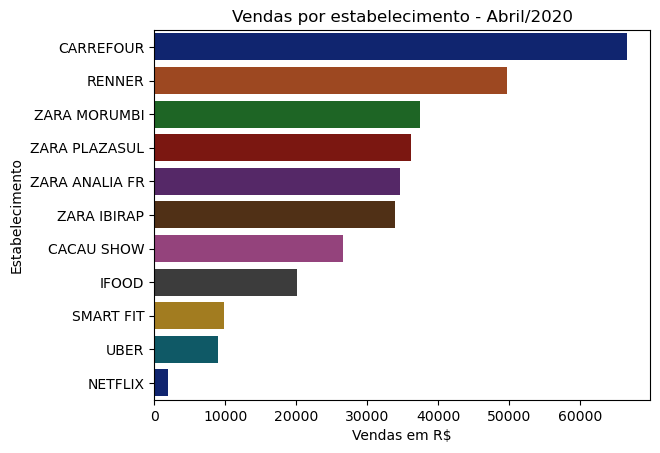

In [27]:
# Verificando qual estabelecimento se destacou em valor de vendas no mês de Abril: 

vendas_abril.loc[:,'estabelecimento'] = vendas_abril['estabelecimento'].str.upper() # transformando todos os nomes em letras maiusculas para corrigir problemas com digitacao (por exemplo Uber/UBER/uber)
vendas_por_estabelecimento_abril = vendas_abril.groupby('estabelecimento')['valor'].sum().reset_index() # criando um DataFrame para utilizar na criação do gráfico.
vendas_por_estabelecimento_abril.columns = ['estabelecimento', 'vendas'] #renomeando as colunas para facilitar a leitura.

# Ordenando os resultados para uma melhor visualizacao no gráfico:

vendas_por_estabelecimento_abril = vendas_por_estabelecimento_abril.sort_values(by='vendas', ascending=False)

# Criando um gráfico representando o resultado: 

sns.barplot(y='estabelecimento', x='vendas', data=vendas_por_estabelecimento_abril, hue= 'estabelecimento',palette='dark')
plt.title('Vendas por estabelecimento - Abril/2020')
plt.ylabel('Estabelecimento')
plt.xlabel('Vendas em R$')



#### verificando o ticket médio por estabelecimentos (mês de abril):

In [28]:
# calculando o ticket médio:

vendas_abril.groupby('estabelecimento')['valor'].mean()

estabelecimento
CACAU SHOW         369.791667
CARREFOUR         1072.370968
IFOOD              158.110236
NETFLIX             32.161290
RENNER             250.510101
SMART FIT          134.726027
UBER                54.914110
ZARA ANALIA FR     549.682540
ZARA IBIRAP        498.455882
ZARA MORUMBI       534.757143
ZARA PLAZASUL      523.739130
Name: valor, dtype: float64

Text(0.5, 0, 'Ticket médio em R$')

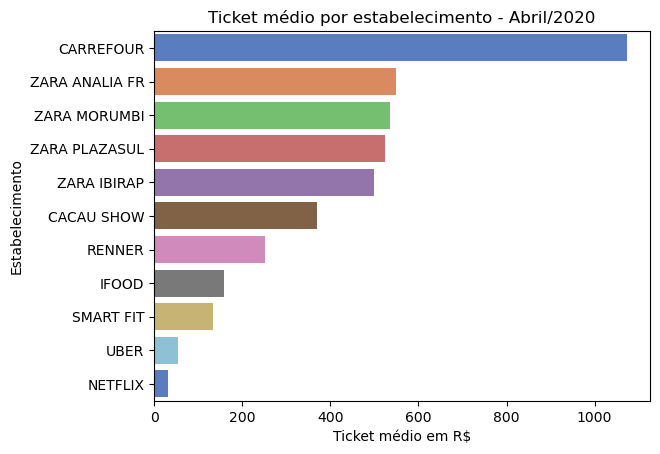

In [29]:
ticket_medio_por_estabelecimento_abril = vendas_abril.groupby('estabelecimento')['valor'].mean().reset_index() # criando um DataFrame para utilizar na criação do gráfico.
ticket_medio_por_estabelecimento_abril.columns = ['estabelecimento', 'ticket médio'] #renomeando as colunas para facilitar a leitura.

# Ordenando os resultados para uma melhor visualizacao no gráfico:

ticket_medio_por_estabelecimento_abril = ticket_medio_por_estabelecimento_abril.sort_values(by='ticket médio', ascending=False)

# Criando um gráfico representando o resultado: 

sns.barplot(y='estabelecimento', x='ticket médio', data=ticket_medio_por_estabelecimento_abril, hue= 'estabelecimento',palette='muted')
plt.title('Ticket médio por estabelecimento - Abril/2020')
plt.ylabel('Estabelecimento')
plt.xlabel('Ticket médio em R$')

In [30]:
# valores de ticket medio: 

ticket_medio_por_estabelecimento_abril

,estabelecimento,ticket médio
1,CARREFOUR,1072.370968
7,ZARA ANALIA FR,549.682540
9,ZARA MORUMBI,534.757143
10,ZARA PLAZASUL,523.739130
8,ZARA IBIRAP,498.455882
0,CACAU SHOW,369.791667
4,RENNER,250.510101
2,IFOOD,158.110236
5,SMART FIT,134.726027
6,UBER,54.914110


#### verificando o número de transações por estabelecimento (mês de abril):

Text(0.5, 0, 'Nº transações')

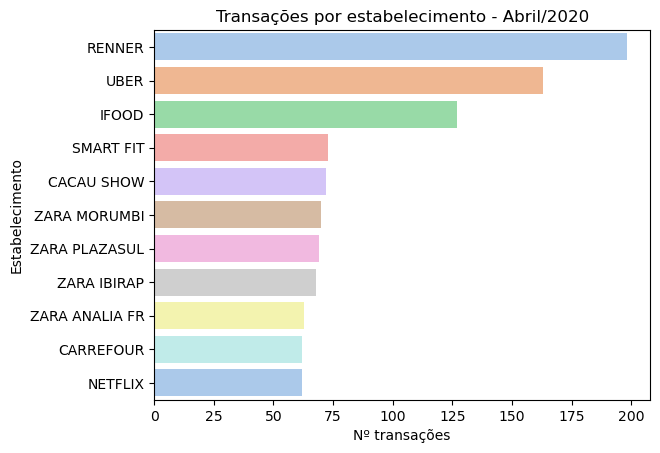

In [31]:
# calculando o número de transações: 

transacoes_por_estabelecimentos_abril = vendas_abril.groupby('estabelecimento')['valor'].count().reset_index()
transacoes_por_estabelecimentos_abril.columns = ['estabelecimento', 'transações'] #renomeando as colunas para facilitar a leitura.

# Ordenando os resultados para uma melhor visualizacao no gráfico:

transacoes_por_estabelecimentos_abril = transacoes_por_estabelecimentos_abril.sort_values(by='transações', ascending=False)

# Criando um gráfico representando o resultado: 

sns.barplot(y='estabelecimento', x='transações', data=transacoes_por_estabelecimentos_abril, hue= 'estabelecimento',palette='pastel')
plt.title('Transações por estabelecimento - Abril/2020')
plt.ylabel('Estabelecimento')
plt.xlabel('Nº transações')

## Verificando se o gênero influencia no hábito de compra dos clientes:

In [32]:
# Fazendo o merge para cruzar as duas tabelas com base na coluna 'cpf':

cliente_transacoes = pd.merge(db_cliente, db_transacoes, how='left', on = 'cpf')

In [33]:
# Agrupando as apenas as transações aprovadas por estabelecimentos e por sexo:

transacoes_aprovadas = cliente_transacoes[cliente_transacoes['status'] == 'aprovada'] #filtrando as transações com status aprovada.
transacoes_aprovadas.loc[:,'estabelecimento'] = transacoes_aprovadas['estabelecimento'].str.upper() #corrigindo o proglema de digitação dos estabelecimentos (por exemplo Uber/UBER/uber)
transacoes_por_sexo_por_estabelecimento = transacoes_aprovadas.groupby(['sexo','estabelecimento'])['id_tran'].count() #agrupando as transacoes por sexo e estabelecimento

#### número de transações por gênero por estabelecimentos:

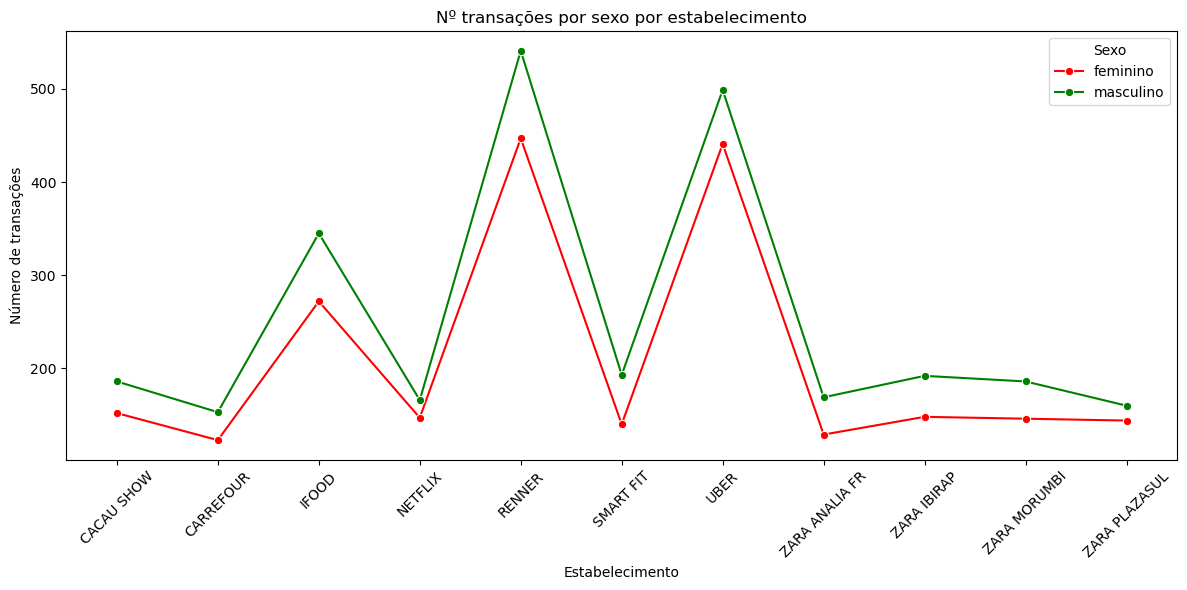

In [34]:
# Organizando as colunas para facilitar na plotagem: 

df_transacoes = transacoes_por_sexo_por_estabelecimento.reset_index()
df_transacoes.columns = ['sexo', 'estabelecimento', 'transacoes']

# Criando o gráfico de linhas para a visualização do resultado:

plt.figure(figsize=(12, 6))
sns.lineplot( x='estabelecimento', y='transacoes', hue='sexo', data=df_transacoes, marker='o', palette={'feminino': 'red', 'masculino': 'green'})
plt.xticks(rotation=45)
plt.title('Nº transações por sexo por estabelecimento')
plt.xlabel('Estabelecimento')
plt.ylabel('Número de transações')
plt.legend(title='Sexo')
plt.tight_layout() 
plt.show()

#### média do valor gasto por gênero por estabelecimentos:

In [35]:
# Agrupando as apenas as transações aprovadas por estabelecimentos e por sexo:

transacoes_aprovadas = cliente_transacoes[cliente_transacoes['status'] == 'aprovada'] #filtrando as transações com status aprovada.
transacoes_aprovadas.loc[:,'estabelecimento'] = transacoes_aprovadas['estabelecimento'].str.upper() #corrigindo o proglema de digitação dos estabelecimentos (por exemplo Uber/UBER/uber)
avg_por_sexo_por_estabelecimento = transacoes_aprovadas.groupby(['sexo','estabelecimento'])['valor'].mean() #agrupando média das transacoes por sexo e estabelecimento

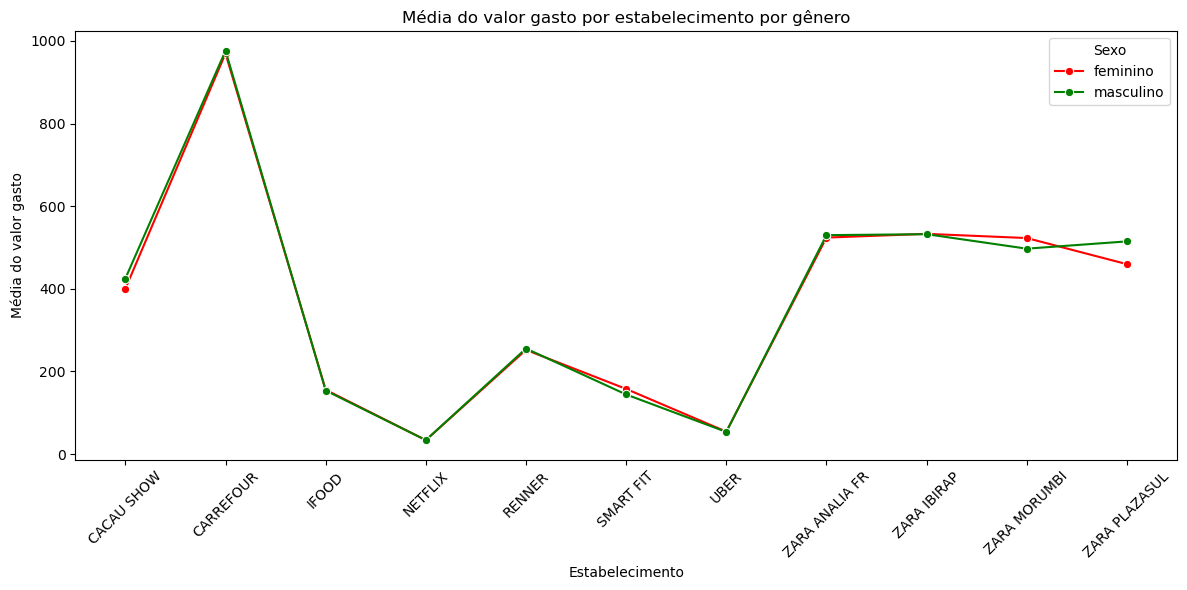

In [36]:
# Organizando as colunas para facilitar na plotagem: 

df_avg_sexo_por_estabelecimento = avg_por_sexo_por_estabelecimento.reset_index()
df_avg_sexo_por_estabelecimento.columns = ['sexo', 'estabelecimento', 'transacoes']

# Criando o gráfico de linhas para a visualização do resultado:

plt.figure(figsize=(12, 6))
sns.lineplot( x='estabelecimento', y='transacoes', hue='sexo', data=df_avg_sexo_por_estabelecimento, marker='o', palette={'feminino': 'red', 'masculino': 'green'})
plt.xticks(rotation=45)
plt.title('Média do valor gasto por estabelecimento por gênero')
plt.xlabel('Estabelecimento')
plt.ylabel('Média do valor gasto')
plt.legend(title='Sexo')
plt.tight_layout() 
plt.show()

#### ticket médio por gênero:

In [37]:
# Filtrando as transacoes por sexo e calculando o ticket médio de cada sexo:

transacoes_clientes_masc = cliente_transacoes[cliente_transacoes['sexo'] == 'masculino']
transacoes_clientes_fem = cliente_transacoes[cliente_transacoes['sexo'] == 'feminino']
ticket_medio_masc = transacoes_clientes_masc['valor'].mean()
ticket_medio_fem = transacoes_clientes_fem['valor'].mean()

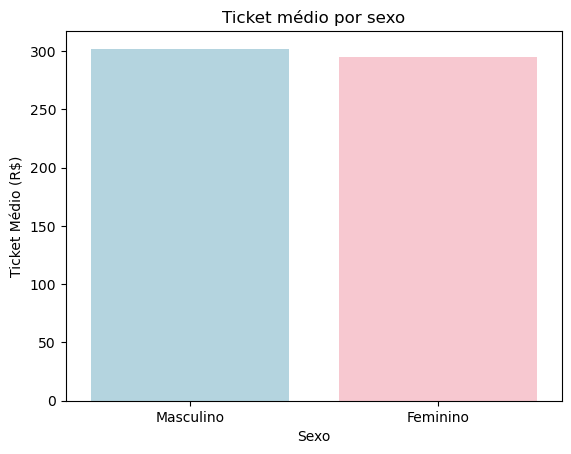

In [38]:
# Criando o gráfico de barras que representa os valores de ticket médio por sexo:

ticket_medio = pd.DataFrame({
    'Sexo': ['Masculino', 'Feminino'],
    'Ticket Medio': [ticket_medio_masc, ticket_medio_fem]
})
sns.barplot(x= 'Sexo', y= 'Ticket Medio', data = ticket_medio, hue = 'Sexo', palette=['lightblue', 'pink'])
plt.title('Ticket médio por sexo')
plt.ylabel('Ticket Médio (R$)')
plt.show()